# Data preparation

In [35]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('all_reviews.csv')
df.head(10)

,review,sentiment
0,This app talks just like a friend. * loved the...,2
1,it helped so much....,2
2,great app,2
3,Wysa is easy to talk to. I've set up reminders...,2
4,"I was sceptical to start with, and the first f...",2
5,"It's help me so much, Thank you",2
6,"Ai doesn't really read what is written, random...",0
7,"Ironically, this app keeps victim blaming me f...",0
8,create app for mental health,2
9,useless fraud application,0


In [174]:
df.isnull().sum()

review       1
sentiment    0
dtype: int64

In [176]:
df = df.dropna()

In [178]:
df.shape

(45650, 2)

# Data Visualization

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
value_counts = df['sentiment'].value_counts()
value_counts

sentiment
2    42751
0     1929
1      970
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

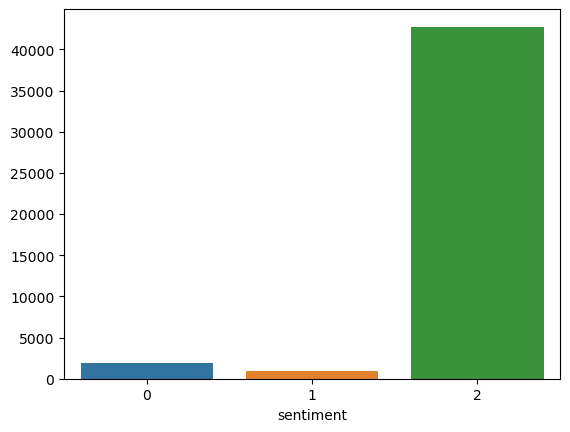

In [184]:
sns.barplot(x=value_counts.index, y=value_counts.values)

In [190]:
from wordcloud import WordCloud

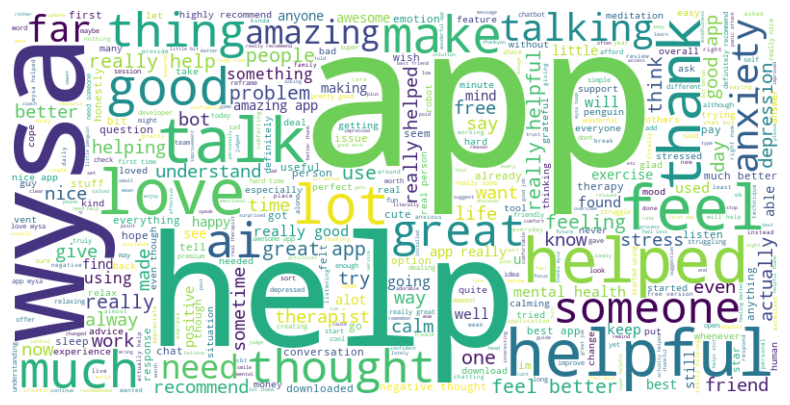

In [196]:
word = ' '.join(df['review'])
word_cloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(word)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Cleaning

In [200]:
import re

def cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text = re.sub(r'#','', text) #remove hash
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = re.sub('\s+', ' ', text) #remove new line char
    text = re.sub("\'", "", text) #remove single quotes

    return text

In [202]:
df.dtypes

review       object
sentiment     int64
dtype: object

In [204]:
df["review"] = df["review"].apply(cleaning)
df.head(10)

,review,sentiment
0,this app talks just like a friend. * loved the...,2
1,it helped so much....,2
2,great app,2
3,wysa is easy to talk to. ive set up reminders ...,2
4,"i was sceptical to start with, and the first f...",2
5,"its help me so much, thank you",2
6,"ai doesnt really read what is written, randoml...",0
7,"ironically, this app keeps victim blaming me f...",0
8,create app for mental health,2
9,useless fraud application,0


In [206]:
import string
df["review"] = df["review"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["review"] = df["review"].apply(lambda wrd: ''.join(wrd))

# if above command is not working then apply this
# df['review'] = df['review'].str.strip().str.lower()
# df.tail(10)

In [208]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
df["review"] = df["review"].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DDNest002\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [209]:
df[100:110]

,review,sentiment
100,helped lot sort thoughts,2
101,love app like mate actually listenes u actuall...,2
102,thankyou love service even though sometimes ca...,2
103,terrible terrible chat bot replies nothing con...,0
104,far normal plan helped,2
105,app good really helped,2
106,love app im talking real therapist best people...,2
107,app made feel awesome depressed bad situation ...,2
108,really great ngl,2
109,wysa helpful ive learnt love keep positive env...,2


# Using Naive Bayes

## Splitting Data


In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

## Feature Extraction

In [213]:
from sklearn.feature_extraction.text import CountVectorizer

In [214]:
vec = CountVectorizer(stop_words='english')
X_train = vec.fit_transform(X_train.values.astype('U')).toarray()
X_test = vec.transform(X_test.values.astype('U')).toarray()

## Model Building

In [215]:
from sklearn.naive_bayes import MultinomialNB

In [216]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## Model Evaluation

In [217]:
model.score(X_test, y_test)

0.947316538882804

In [218]:
model.predict(vec.transform(['Likely bought reviews. Nothing special about this one, just the usual scripted self-help junk.']))

array([0], dtype=int64)

In [241]:
#20964 no. review
model.predict(vec.transform(['Im sure this app works for a lot of people but for me it just doesnt. In my first conversation with Wysa i set up a SMART goal for my intention thing and i typed "I want to shower at least 5 days a week" and it took it as "meditate 5 minutes a day" which was not what i said and i wasnt able to change it. I also tried to get wysa to talk to me about how i lost a friend and i only have one left and she just avoided the convo pretty much. Im glad that free mental healthcare is this available though']))

array([2], dtype=int64)

In [243]:
model.predict(vec.transform(['I dont approve to use this apps premium after go for trial once and I do not subscribe this. I even dont use this app at all and uninstall it. But this apps take my money from the bank without noticing me. Please refund my money back.']))

array([0], dtype=int64)

In [245]:
model.predict(vec.transform(['So far its nice to talk to someone other than relying too much on my friends and family']))

array([2], dtype=int64)

## Save Model

In [146]:
import joblib

In [247]:
#joblib.dump(model, 'model.pkl')

# Keras

In [ ]:
#%https://www.kaggle.com/code/uzzivirus/sentiment-analysis-using-deep-learning/notebook

UsageError: Line magic function `%https://www.kaggle.com/code/uzzivirus/sentiment-analysis-using-deep-learning/notebook` not found.


## Task 1: Using CNN (keras)

### Import libraries


In [ ]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

### Read Data
This data is to train the model that evetually used as a pretrained model. The data is from IMBD movie review data.

In [ ]:
url = "https://raw.githubusercontent.com/saadarshad102/Sentiment-Analysis-CNN/master/imdb_labelled.tsv"

data = pd.read_csv(url, sep='\t', header=None)
data.columns = ['review', 'sentiment']
data.head(10)

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [ ]:
data.sentiment.unique()

array([0, 1])

In [ ]:
data.shape

(748, 2)

In [ ]:
positive = []
negative = []
for l in data.sentiment:
    if l == 0:
        positive.append(0)
        negative.append(1)
    elif l == 1:
        positive.append(1)
        negative.append(0)
data['positive']= positive
data['negative']= negative
data.head(10)

,review,sentiment,positive,negative
0,"A very, very, very slow-moving, aimless movie ...",0,0,1
1,Not sure who was more lost - the flat characte...,0,0,1
2,Attempting artiness with black & white and cle...,0,0,1
3,Very little music or anything to speak of.,0,0,1
4,The best scene in the movie was when Gerardo i...,1,1,0
5,"The rest of the movie lacks art, charm, meanin...",0,0,1
6,Wasted two hours.,0,0,1
7,Saw the movie today and thought it was a good ...,1,1,0
8,A bit predictable.,0,0,1
9,Loved the casting of Jimmy Buffet as the scien...,1,1,0


### Preprocess (Data Cleaning)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

data['clean_review'] = data['review'].apply(lambda x: remove_punct(x))

In [ ]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data.clean_review]


In [ ]:
def lower_token(tokens):
    return [w.lower() for w in tokens]

In [ ]:
lower_tokens = [lower_token(token) for token in tokens]


In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]


In [ ]:
result = [' '.join(sen) for sen in filtered_words]
data['review'] = result
data['tokens'] = filtered_words
data = data[['review', 'tokens', 'sentiment', 'positive', 'negative']]


In [ ]:
data[:15]

,review,tokens,sentiment,positive,negative
0,slowmoving aimless movie distressed drifting y...,"[slowmoving, aimless, movie, distressed, drift...",0,0,1
1,sure lost flat characters audience nearly half...,"[sure, lost, flat, characters, audience, nearl...",0,0,1
2,attempting artiness black white clever camera ...,"[attempting, artiness, black, white, clever, c...",0,0,1
3,little music anything speak,"[little, music, anything, speak]",0,0,1
4,best scene movie gerardo trying find song keep...,"[best, scene, movie, gerardo, trying, find, so...",1,1,0
5,rest movie lacks art charm meaning emptiness w...,"[rest, movie, lacks, art, charm, meaning, empt...",0,0,1
6,wasted two hours,"[wasted, two, hours]",0,0,1
7,saw movie today thought good effort good messa...,"[saw, movie, today, thought, good, effort, goo...",1,1,0
8,bit predictable,"[bit, predictable]",0,0,1
9,loved casting jimmy buffet science teacher,"[loved, casting, jimmy, buffet, science, teacher]",1,1,0


### Split data into test and train

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

7218 words total, with a vocabulary size of 2881
Max sentence length is 789


In [ ]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

580 words total, with a vocabulary size of 457
Max sentence length is 24


### Load Google News Word2Vec model

This will take time, almost

In [ ]:
import gensim.downloader as api

word2vec = api.load('word2vec-google-news-300')

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged



In [ ]:
def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors,
                                                                                generate_missing=generate_missing))
    return list(embeddings)

### Embeddings

In [ ]:
# Get Embeddings
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)


In [ ]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

### Tokenize and Pad sequences

In [ ]:
# Tokenize and Pad sequences
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["review"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["review"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 2881 unique tokens.


In [ ]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(2882, 300)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(data_test["review"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
# Define CNN
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [ ]:
label_names = ['positive', 'negative']
y_train = data_train[label_names].values
x_train = train_cnn_data
y_tr = y_train


In [ ]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 50, 300)        │        864,600 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 49, 200)        │        120,200 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 48, 200)        │        180,200 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 47, 200)        │        240,200 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 46, 200)        │        300,200 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 45, 200)        │        360,200 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_5    │ (None, 200)            │              0 │ conv1d_8[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_6    │ (None, 200)            │              0 │ conv1d_9[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_7    │ (None, 200)            │              0 │ conv1d_10[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_8    │ (None, 200)            │              0 │ conv1d_11[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_9    │ (None, 200)            │              0 │ conv1d_12[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1000)           │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 1000)           │              0 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)      

 Total params: 2,193,986 (8.37 MB)

 Trainable params: 1,329,386 (5.07 MB)

 Non-trainable params: 864,600 (3.30 MB)

In [ ]:
# Train CNN
num_epochs = 3
batch_size = 34


In [ ]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - acc: 0.5448 - loss: 0.7156 - val_acc: 0.8088 - val_loss: 0.5726
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - acc: 0.8636 - loss: 0.4850 - val_acc: 0.7794 - val_loss: 0.4761
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - acc: 0.8802 - loss: 0.3484 - val_acc: 0.7941 - val_loss: 0.4682


In [ ]:
# Test CNN
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


In [ ]:
labels = [1, 0]
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])
sum(data_test.sentiment==prediction_labels)/len(prediction_labels)

0.8133333333333334

In [ ]:
%prediction_labels

UsageError: Line magic function `%prediction_labels` not found.


In [ ]:
data_test.sentiment.value_counts()

,count
sentiment,
0,44
1,31


In [ ]:
amar_samples = ["I am loved", "You are bad", "Halima is good", "I am good"]
amar_seq = tokenizer.texts_to_sequences(amar_samples)
amar_test = pad_sequences(amar_seq, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
amar_pred = model.predict(amar_test, batch_size=32, verbose=1)
amar_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.88475627, 0.167585  ],
       [0.10414557, 0.88736624],
       [0.52362144, 0.51914215],
       [0.5236213 , 0.51914215]], dtype=float32)

In [ ]:
amar_labels = [1, 0]
amar_pred_labels=[]
for pred in amar_pred:
    amar_pred_labels.append(labels[np.argmax(pred)])
print(amar_pred_labels)

[1, 0, 1, 1]


In [ ]:
for p in amar_pred_labels:
  if p == 1:
    print("Positive")
  else:
    print("Negative")

Positive
Negative
Positive
Positive


# Task 2: Using TFIDF and Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['ethic'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data to create the TF-IDF matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data (no fit, to avoid data leakage)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


NameError: name 'df' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model using the TF-IDF features and corresponding labels
model.fit(X_train_tfidf, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
# Example of new data
new_data = ["A little background: I dropped out of grad school some years ago due to depression associated with untreated gender dysphoria and anxiety associated with being raised by an emotionally abusive parent. I've been in therapy for several years, and I've been active in a number of online communities full of people with mental health issues sharing wisdom and resources. I am currently dealing with a bit of burnout related to providing emotional support to other people as well as long-term issues with managing major projects and responsibilities, like applying for disability. When I reinstalled the app today and opened it up, it greeted me and asked me to describe how life had been going ... by dragging up or down on the screen to change the expression on a yellow smiley face. And then it asked me to confirm that I had read the privacy policy and terms of services. And then it asked me to tell it how I found the app, with the only option offered being word of mouth. This is one of the most insulting onboarding experiences I have had with any piece of software in my entire life. I wouldn't recommend this to anyone. I would actively steer them away from it."]
new_data_tfidf = tfidf_vectorizer.transform(new_data)

# Predict sentiment
predictions = model.predict(new_data_tfidf)
print(predictions)


# Task 1: Using Machine Learning
Data set: Amazon Musical Instruments Reviews.


### Import Libraries

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

# NLP libraries
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

# EDA Analysis
# Text Polarity
from textblob import TextBlob
# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Word Cloud
from wordcloud import WordCloud

# Feature Engineering
# Label Encoding
from sklearn.preprocessing import LabelEncoder
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter
# Splitting Dataset
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Dataset

Amazon Musical Instruments Reviews

Link: https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/themasudur/Sentiment-Analysis/main/musical_instruments_reviews.csv")
dataset.shape

(10261, 9)

### Missing values

In [ ]:
dataset.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
dataset.reviewText.fillna(value = "", inplace = True)

### Ploting the ratings for labeling

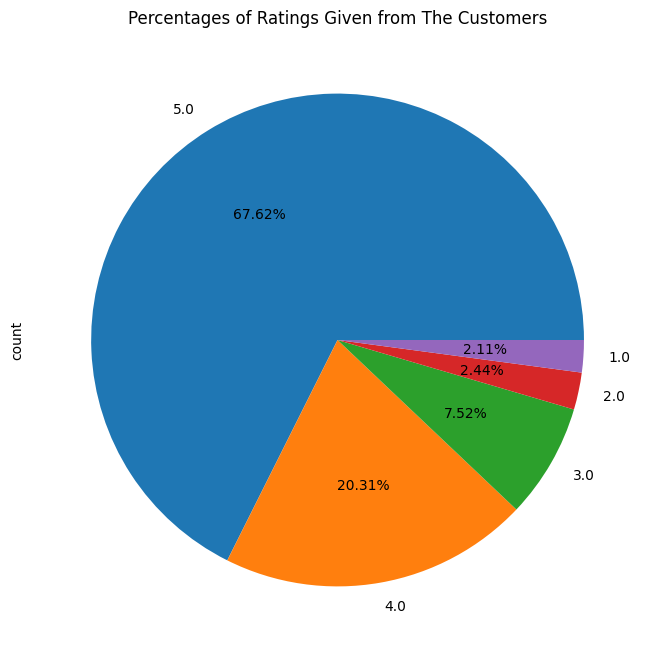

In [ ]:
dataset.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()



* Ratings above 3 are positive
* Ratings under 3 are negative
* Rating equals to 3 is neutral
    


     



In [ ]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

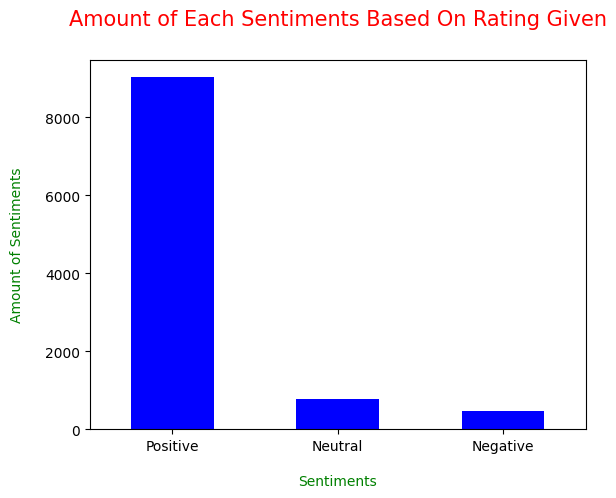

In [ ]:
dataset["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
dataset.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014",Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",Neutral
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",Positive


### Text Cleaning

In [ ]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [ ]:
dataset["reviewText"] = dataset["reviewText"].apply(lambda Text: Text_Cleaning(Text))

### Text Processing

In [ ]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

In [ ]:
def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [ ]:
dataset["reviewText"] = dataset["reviewText"].apply(lambda Text: Text_Processing(Text))

In [ ]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "overall", "summary"]
dataset.drop(columns = Columns, axis = 1, inplace = True)

KeyError: "['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime', 'overall', 'summmary'] not found in axis"

In [ ]:
dataset.head(10)

,reviewText,summary,sentiment
0,not much write exactly supposed filter pop sou...,good,Positive
1,product exactly quite affordable not realized ...,Jake,Positive
2,primary job device block breath would otherwis...,It Does The Job Well,Positive
3,nice windscreen protects mxl mic prevents pop ...,GOOD WINDSCREEN FOR THE MONEY,Positive
4,pop filter great look performs like studio fil...,No more pops when I record my vocals.,Positive
5,good bought another one love heavy cord gold c...,The Best Cable,Positive
6,used monster cable year good reason lifetime w...,Monster Standard 100 - 21' Instrument Cable,Positive
7,use cable run output pedal chain input fender ...,Didn't fit my 1996 Fender Strat...,Neutral
8,perfect epiphone sheraton ii monster cable wel...,Great cable,Positive
9,monster make best cable lifetime warranty does...,Best Instrument Cables On The Market,Positive


### Encoding Our Target Variable

In [ ]:
Encoder = LabelEncoder()
dataset["sentiment"] = Encoder.fit_transform(dataset["sentiment"])

In [ ]:
dataset["sentiment"].value_counts()

,count
sentiment,
2,9022
1,772
0,467


### TF-IDF Vectorizer



     


In [ ]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(dataset["reviewText"])

# Check our matrix shape
X.shape

(10261, 5000)

In [ ]:
# Declaring our target variable
y = dataset["sentiment"]

### Resampling Our Dataset

In [ ]:
Counter(y)

Counter({2: 9022, 1: 772, 0: 467})

In [ ]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [ ]:
Counter(y_final)

Counter({2: 9022, 1: 9022, 0: 9022})

### Splitting Our Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

### Train

In [ ]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.8127872965980893
Logistic Regression Test Accuracy: 0.8803235639678011
SVC Test Accuracy: 0.8796412078557315
Random Forest Test Accuracy: 0.8712601855173474
Naive Bayes Test Accuracy: 0.805183344057428
K-Neighbors Test Accuracy: 0.8794462760818524


In [ ]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following e

Best Accuracy: 93.22 %
Best Parameters: {'C': 10000.0, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Best model evaluation

In [ ]:
Classifier = LogisticRegression(random_state = 42, C = 10000.0, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_score(y_test, Prediction)

0.9349785724841141

In [ ]:
cm = confusion_matrix(y_test, Prediction)


In [ ]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


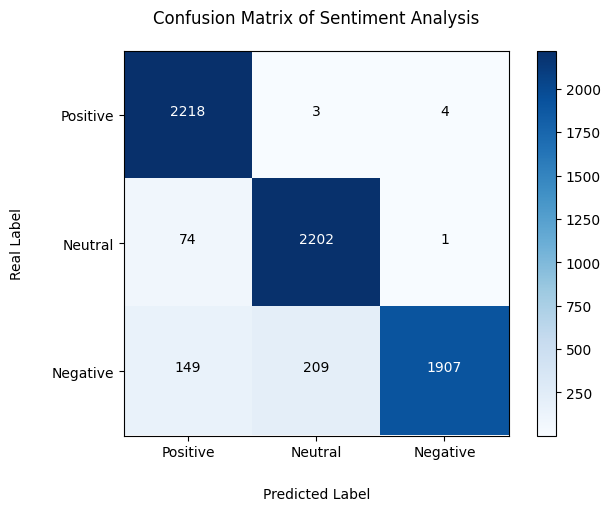

In [ ]:
plot_cm(cm, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")
